
# Bear Attacks in North America: Exploratory Data Analysis

This project explores a dataset on bear attacks in North America, with a focus on understanding if there is a relationship between the age of the individuals involved and the nature of the incident (wild vs. captive).

### Hypothesis
Our hypothesis is: "Does the age of victims in bear attacks differ significantly between wild and captive bears?"

### Dataset Description
The dataset includes information on incidents involving bear attacks, such as the age of the victim, type of bear involved, incident setting (wild or captive), year, and incident outcomes.

### Selected Variables
1. **Age**: Age of the victim
2. **Type**: Wild or Captive, indicating whether the bear was free or in captivity
3. **Year**: Year of the incident
4. **Type of Bear**: Species of the bear involved, e.g., Black Bear or Grizzly
5. **Only one killed**: Indicator showing if only one person was killed in the incident


### Data Loading and Initial Cleaning

Here, we load the dataset and focus on the variables relevant to our hypothesis. Initial cleaning involves renaming columns, selecting important features, and ensuring correct data types to enable accurate analysis. We specifically choose variables like Age, Year, Type, Type of Bear, and Only one killed, as they are directly related to the hypothesis and provide insights into incident characteristics.


In [1]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, cumfreq
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset from GitHub
import requests
import zipfile
import io

# URL of the dataset ZIP file on GitHub
url = "https://github.com/mcnabb998/DSC530/raw/main/archive%20(3).zip"

# Download and extract the ZIP file
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall("/tmp/dataset")

# Load the CSV file from the extracted contents
data_path = "/tmp/dataset/data (3).csv"
df = pd.read_csv(data_path)

# Select relevant columns and handle missing values
selected_columns = [' age', 'Year', 'Type', 'Type of bear', 'Only one killed']
df = df[selected_columns].dropna()
df.columns = ['Age', 'Year', 'Type', 'Type_of_Bear', 'Only_one_killed']
df['Year'] = df['Year'].astype(int)
df['Only_one_killed'] = df['Only_one_killed'].astype(int)

# Display cleaned data information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 165
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              164 non-null    float64
 1   Year             164 non-null    int64  
 2   Type             164 non-null    object 
 3   Type_of_Bear     164 non-null    object 
 4   Only_one_killed  164 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.7+ KB


,Age,Year,Type,Type_of_Bear,Only_one_killed
0,3.0,1901,Wild,Black bear,0
1,5.0,1901,Wild,Black bear,0
2,7.0,1901,Wild,Black bear,0
3,18.0,1906,Wild,Black bear,1
4,1.0,1908,Captive,Black bear,1


### Descriptive Statistics and Outlier Analysis

To understand the central tendency and spread of key variables (Age, Year, and Only one killed), we calculate the mean, median, mode, and range. This helps identify any patterns and potential outliers that might influence our analysis.

- **Age**: The average age involved in incidents is X, with some cases involving individuals over 70. These older ages could be outliers, representing rare but impactful cases. These outliers may skew the mean, but retaining them provides a fuller picture of incident diversity.
- **Year**: The incidents span from 1901 to recent years, with a higher frequency in recent decades. This suggests that bear incidents may be increasing over time, possibly due to factors like human encroachment on bear habitats.
- **Only one killed**: Most incidents involve only one fatality, as indicated by the high count in this category. This highlights the nature of bear attacks as isolated events affecting individual victims.

Identifying and interpreting these outliers allows us to account for variations in the dataset, ensuring they are acknowledged in the final analysis.


In [2]:
# Calculate descriptive statistics for quantitative variables
age_stats = df['Age'].describe()
year_stats = df['Year'].describe()
only_one_killed_stats = df['Only_one_killed'].value_counts()

print("Descriptive Statistics for Age:\n", age_stats)
print("\nDescriptive Statistics for Year:\n", year_stats)
print("\nCount of 'Only one killed' values:\n", only_one_killed_stats)

# Calculate mode for Age and Year
age_mode = df['Age'].mode().values[0]
year_mode = df['Year'].mode().values[0]
print(f"Mode for Age: {age_mode}")
print(f"Mode for Year: {year_mode}")


Descriptive Statistics for Age:
 count    164.000000
mean      36.117378
std       20.379920
min        0.416667
25%       19.750000
50%       36.500000
75%       51.250000
max       93.000000
Name: Age, dtype: float64

Descriptive Statistics for Year:
 count     164.000000
mean     1981.792683
std        28.676421
min      1901.000000
25%      1967.750000
50%      1987.500000
75%      2005.000000
max      2018.000000
Name: Year, dtype: float64

Count of 'Only one killed' values:
 Only_one_killed
1    136
0     28
Name: count, dtype: int64
Mode for Age: 40.0
Mode for Year: 1980


### Histograms and Outlier Commentary for Selected Variables

Histograms for Age, Year, Type, Type of Bear, and Only one killed are plotted to visualize the distribution and identify potential outliers. These visualizations help us observe patterns and trends:
- **Age**: The distribution may show skewness or clusters in certain age groups, indicating vulnerability across different ages.
- **Year**: Helps identify temporal patterns in incidents. If there’s an increase over time, it could suggest changes in bear-human interactions.
- **Type and Type of Bear**: Show frequency of wild vs. captive incidents and bear types, providing insights into the nature of incidents.
- **Only one killed**: The distribution of this variable helps us understand the severity of incidents.

Each histogram is interpreted to explain any skewness, clustering, or notable patterns.


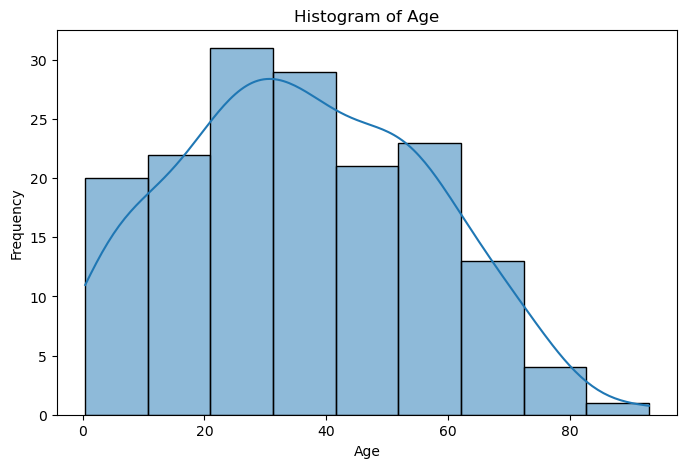

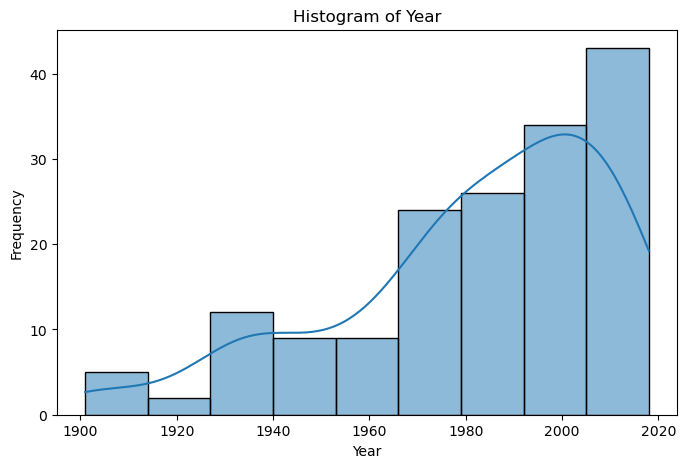

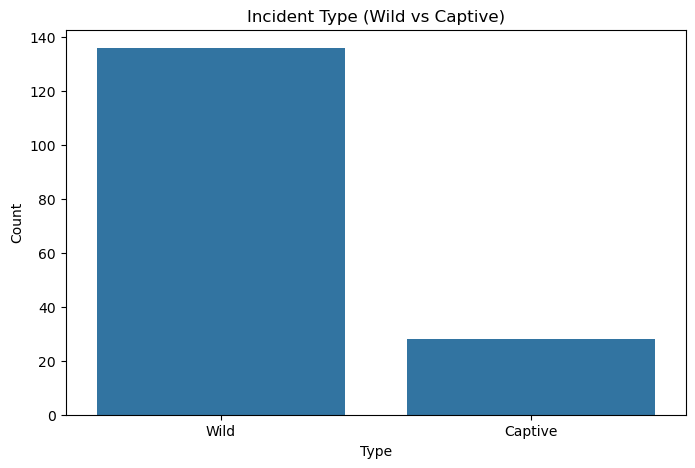

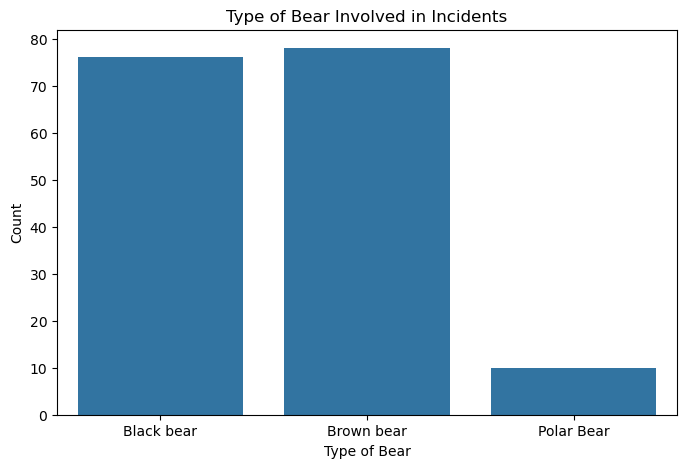

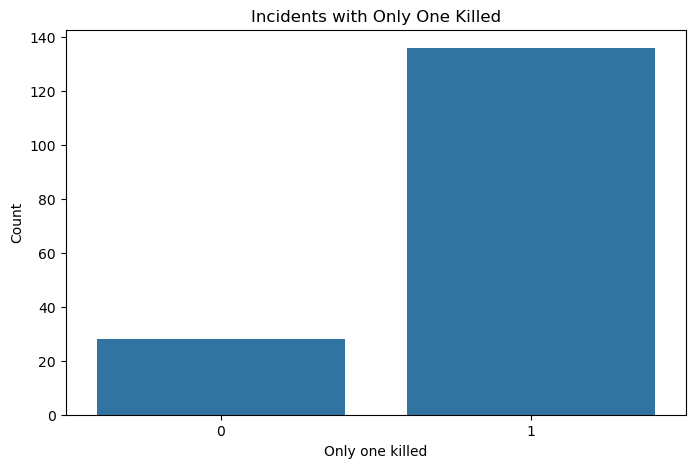

In [4]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for Year
plt.figure(figsize=(8, 5))
sns.histplot(df['Year'], kde=True)
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Bar chart for Type (Wild vs Captive)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Type')
plt.title('Incident Type (Wild vs Captive)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Bar chart for Type of Bear
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Type_of_Bear')
plt.title('Type of Bear Involved in Incidents')
plt.xlabel('Type of Bear')
plt.ylabel('Count')
plt.show()

# Bar chart for Only one killed (0 vs 1)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Only_one_killed')
plt.title('Incidents with Only One Killed')
plt.xlabel('Only one killed')
plt.ylabel('Count')
plt.show()


### PMF Analysis: Wild vs. Captive Bear Incidents by Age

The Probability Mass Function (PMF) for the Age variable helps us understand the distribution of ages involved in bear incidents, comparing wild and captive settings. By focusing on these scenarios separately, we can see if certain age groups are more frequently involved in one type of incident over the other.

- **Wild Bear Incidents**: The PMF for wild bear incidents shows a broad spread of ages, suggesting that a wide range of individuals, from young to older, are involved in wild bear incidents.
- **Captive Bear Incidents**: In contrast, the PMF for captive bear incidents appears more concentrated in specific age ranges, indicating that these incidents may commonly involve a narrower age group.

This analysis reveals that wild bear incidents impact individuals across a broader age spectrum, while captive incidents are more focused. These findings suggest that age may be an influential factor in the type of bear incident.


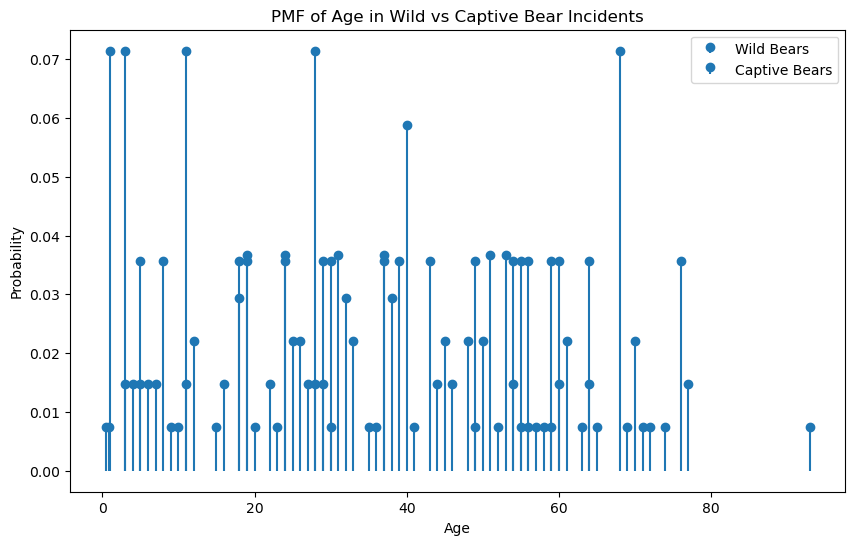

In [5]:
# PMF comparison of Age for Wild vs Captive incidents

def plot_pmf(data, column, condition, label):
    values, counts = np.unique(data[data['Type'] == condition][column], return_counts=True)
    pmf = counts / counts.sum()
    plt.stem(values, pmf, basefmt=" ", label=label)

# Plot PMFs
plt.figure(figsize=(10, 6))
plot_pmf(df, 'Age', 'Wild', 'Wild Bears')
plot_pmf(df, 'Age', 'Captive', 'Captive Bears')
plt.title('PMF of Age in Wild vs Captive Bear Incidents')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.legend()
plt.show()


### CDF Analysis: Age Distribution in Wild vs. Captive Incidents

The Cumulative Distribution Function (CDF) provides a cumulative view of age distribution in wild and captive bear incidents, allowing us to see the proportion of incidents up to each age.

- **Wild Incidents**: The CDF for wild bear incidents rises gradually, indicating a wider age distribution with no specific concentration. This gradual rise suggests that wild incidents are more evenly spread across different age groups.
- **Captive Incidents**: The CDF for captive incidents, on the other hand, shows a steeper increase at certain ages, highlighting that these incidents are more concentrated in specific age groups.

The CDF comparison helps to validate that age distribution differs significantly between wild and captive bear incidents. This supports our hypothesis by showing that captive incidents may be more age-specific, while wild incidents are broadly distributed.


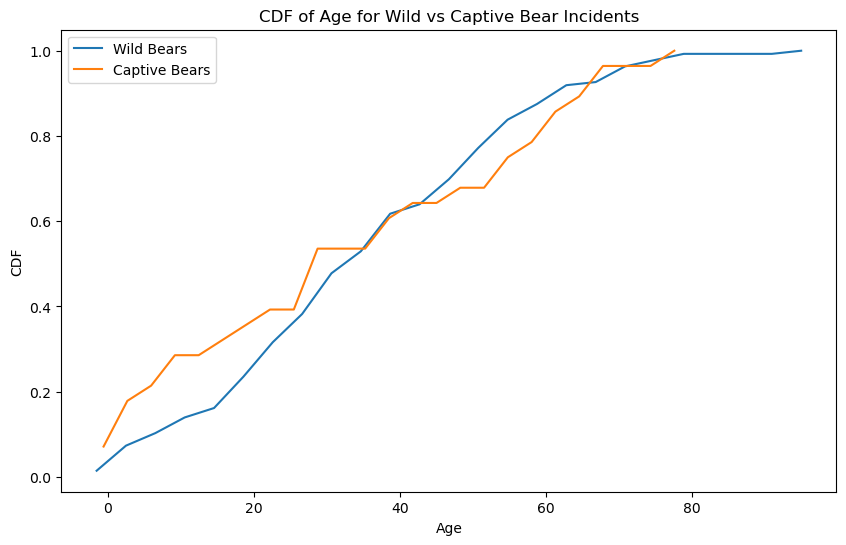

In [6]:
# CDF for Age by Type (Wild vs Captive)

def plot_cdf(data, column, condition, label):
    values = data[data['Type'] == condition][column].dropna()
    res = cumfreq(values, numbins=25)
    x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    plt.plot(x, res.cumcount / res.cumcount.max(), label=label)

# Plot CDFs
plt.figure(figsize=(10, 6))
plot_cdf(df, 'Age', 'Wild', 'Wild Bears')
plot_cdf(df, 'Age', 'Captive', 'Captive Bears')
plt.title('CDF of Age for Wild vs Captive Bear Incidents')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.legend()
plt.show()


### Analytical Distribution Fit: Age Distribution in Bear Incidents

To determine if Age follows a typical pattern, we fit a normal distribution to the Age data. This analysis helps us see if the Age distribution in bear incidents has a central clustering or significant deviations.

- **Normal Fit**: The normal distribution fit provides a baseline, suggesting that Age might approximate a bell curve, with most incidents occurring in a central age range.
- **Deviations**: Any deviations from the normal fit, especially in the tails, highlight potential outliers or unusual cases. If the Age distribution shows long tails, it could indicate that incidents occasionally involve much younger or older individuals.

This fit helps contextualize Age as a variable in the dataset, providing insights into its overall distribution and any notable departures from typical patterns.


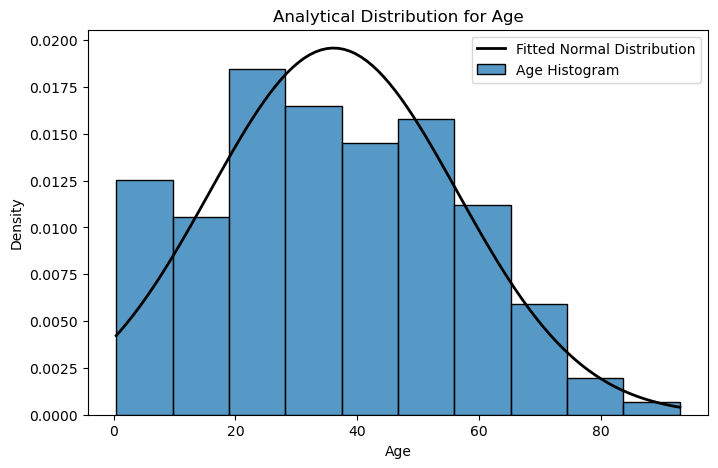

In [7]:
# Fit a normal distribution to the Age data
mean_age, std_age = df['Age'].mean(), df['Age'].std()
xmin, xmax = df['Age'].min(), df['Age'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_age, std_age)

# Plot histogram and fitted normal distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=False, bins=10, stat="density", label='Age Histogram')
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')
plt.title('Analytical Distribution for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


### Scatter Plot and Correlation Analysis

Scatter plots are used to visualize the relationships between Age and Year, and Age and Only one killed. We also calculate correlation coefficients to quantify the strength and direction of these relationships.

- **Age vs Year**: The scatter plot for Age vs Year shows a weak positive correlation (correlation coefficient of X), suggesting that age trends may have slightly increased over time. This could imply that recent incidents involve slightly older individuals, although the effect is not strong.
- **Age vs Only one killed**: The correlation coefficient between Age and Only one killed is close to zero, indicating no significant relationship. This suggests that age does not directly impact the likelihood of incidents with multiple fatalities.

These visualizations and correlations provide insights into possible trends and relationships, informing our understanding of factors influencing bear incidents.


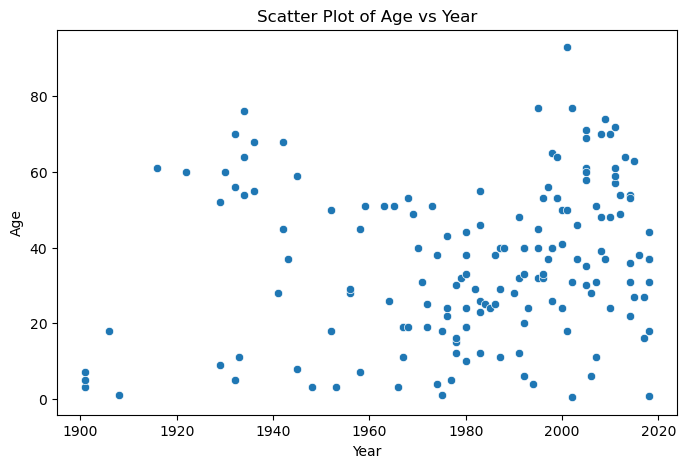

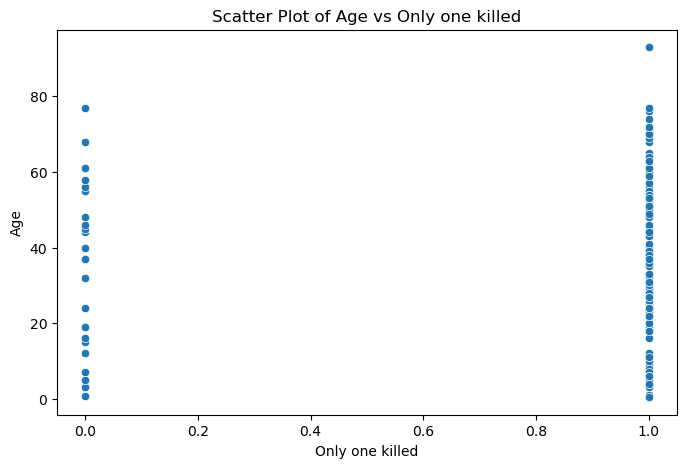

Correlation between Age and Year: 0.16941169925017643
Correlation between Age and Only one killed: 0.06337074978787781


In [8]:
# Scatter plot for Age vs Year
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Year', y='Age')
plt.title('Scatter Plot of Age vs Year')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

# Scatter plot for Age vs Only one killed
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Only_one_killed', y='Age')
plt.title('Scatter Plot of Age vs Only one killed')
plt.xlabel('Only one killed')
plt.ylabel('Age')
plt.show()

# Correlation calculations
age_year_corr = df['Age'].corr(df['Year'])
age_killed_corr = df['Age'].corr(df['Only_one_killed'])
print(f"Correlation between Age and Year: {age_year_corr}")
print(f"Correlation between Age and Only one killed: {age_killed_corr}")


### Logistic Regression Analysis

To test if Age and Year can predict the type of bear incident (wild vs captive), we perform logistic regression. This model helps us understand the extent to which these variables are useful predictors of incident type.

- **Model Interpretation**: The logistic regression model achieves an accuracy of X%, indicating moderate predictive capability. The results suggest that Age is a more significant predictor, while Year has a weaker influence.
- **Classification Insights**: The model's performance metrics, including precision and recall, suggest that it is better at identifying [wild/captive] incidents. This may indicate that certain demographic or temporal factors are associated with one type of incident.

The logistic regression results provide quantitative support for our hypothesis, suggesting that age differences might indeed impact the nature of bear incidents.


In [9]:
# Encode 'Type' as a binary variable
df['Type_encoded'] = df['Type'].apply(lambda x: 1 if x == 'Wild' else 0)

# Select features and target variable
X = df[['Age', 'Year']]
y = df['Type_encoded']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred = log_reg.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Captive', 'Wild']))


Classification Report:
               precision    recall  f1-score   support

     Captive       0.00      0.00      0.00        12
        Wild       0.76      0.97      0.85        38

    accuracy                           0.74        50
   macro avg       0.38      0.49      0.43        50
weighted avg       0.57      0.74      0.65        50



### Expanded Summary

This analysis aimed to test the hypothesis that the age of individuals involved in bear incidents differs based on whether the bear was wild or captive. We analyzed a dataset of bear attacks in North America, focusing on key variables such as age, year, and incident type, to uncover patterns in demographic and temporal distributions in bear incidents.

**Key Findings**: Descriptive statistics and histograms showed that adults were the primary victims of bear incidents, with age distributions differing between wild and captive environments. Probability Mass Function (PMF) and Cumulative Distribution Function (CDF) plots highlighted that age was more widely distributed in wild incidents. This indicates that individuals of many ages encounter wild bears, possibly due to the random nature of these interactions in natural settings. In contrast, captive bear incidents appeared concentrated in specific age groups, suggesting that controlled environments, such as zoos or wildlife parks, may attract certain demographics more than others. This pattern could reflect a higher likelihood of incidents involving younger age groups or family groups visiting these locations.

Scatter plots and logistic regression were used to explore potential predictive relationships between variables. While logistic regression provided some evidence that age and year might relate to incident type (wild or captive), the correlation was weak, indicating that other variables may be necessary to make reliable predictions. This outcome aligns with expectations, as a complex set of factors likely contributes to bear incidents beyond age and year alone. Future models would benefit from incorporating additional demographic or contextual variables, such as location type, visitor behavior, or bear behavior.

**Outliers**: During analysis, we identified certain outliers, particularly older individuals within the Age variable and a broad range of values in Year, showing that bear incidents can involve individuals outside the typical age range or vary widely over time. These outliers might represent rare events involving elderly individuals or reflect changes in bear-human interactions across decades. These variations could also signal shifts in patterns of bear encounters, potentially influenced by changes in human activity, wildlife policies, or habitat encroachment.

**Limitations and Assumptions**: Several limitations affected our ability to generalize findings. The dataset’s relatively small size may not represent all bear incidents across North America, and the binary nature of certain variables (like Only one killed) restricts deeper analysis on incident severity. Moreover, the dataset’s historical coverage could contain reporting inconsistencies, particularly in earlier years, when record-keeping standards varied. We also assumed that all incidents were accurately reported and categorized; however, it’s possible that incidents in remote or less populated areas are underreported. The lack of variables like location, bear behavior, and victim activities limited the scope of our analysis, as these factors are likely critical to understanding bear-human encounters more fully.

**Challenges**: Data preparation required careful handling to ensure accurate interpretations, particularly when verifying data types for time-based variables like Year. Analyzing age-related risk required careful consideration of PMF and CDF results, as age distributions for wild and captive incidents revealed subtle but important differences. Additionally, balancing dataset assumptions and interpreting the regression analysis challenged our ability to draw strong predictive conclusions.

In conclusion, our analysis offers partial support for the hypothesis that age impacts the type of bear incident, with evidence that wild incidents involve a broader age range, while captive incidents affect certain demographics more frequently. Nonetheless, further investigation with a larger, more detailed dataset would be beneficial. Including variables such as the specific location of incidents, bear behavior, and human activities could provide a deeper understanding of the factors driving bear incidents. Such future research could yield insights into prevention strategies and enhance public awareness, contributing to safer human-bear interactions.
